In [1]:
!pip install rectpack

  Preparing metadata (setup.py) ... done
  Created wheel for rectpack: filename=rectpack-0.2.2-py3-none-any.whl size=19333 sha256=a52bed283d3c42985a2994b632d435dd6b296fed964110a61a43c832c7f4a4ff
  Stored in directory: /root/.cache/pip/wheels/c7/40/95/f04f84afcee7624b9bb02c652d8116f0ffa3653f962ce46fa3
Successfully built rectpack


## Create a packer with specified algorithms and options
### mode=`PackingMode.Offline`
- Offline packing mode  : Packs all rectangles at once.
- `PackingMode.Online`    : Packs rectangles one at a time as they arrive. Use this for dynamic or real-time packing scenarios.

### bin_algo=`PackingBin.BBF`
- Best Bin Fit  : Selects the bin where the rectangle fits best.
- `PackingBin.BFF`  : Best Fit First - Tries to place each rectangle in the most space-efficient bin.
- `PackingBin.WF` : Worst Fit - Chooses the bin with the most remaining space.
- `PackingBin.NF` : Next Fit - Uses the first available bin that fits the rectangle.
- `PackingBin.FF` : First Fit - Similar to Next Fit but checks all bins in order.

### pack_algo=`MaxRectsBl`
- `MaxRectsBssf` - Max Rectangles (Best Short Side Fit): Chooses placement based on the shortest side.
- `MaxRectsBaf`: Best Area Fit - Prioritizes minimizing the leftover space in the bin.
- `MaxRectsBl`: Bottom-Left - Places rectangles closest to the bottom-left corner.
- `GuillotineBssf`: Guillotine partitioning (Best Short Side Fit) - Cuts bins into sections.
- `GuillotineBaf`: Guillotine (Best Area Fit).
- `SkylineBlWm`: Skyline (Bottom-Left with Minimal Waste).

### sort_algo=`SORT_NONE`
- `SORT_AREA`: Sorts rectangles by area (largest first).
- `SORT_NONE`: No sorting; rectangles are packed in the order they're added.
- `SORT_PERI`: Sorts by perimeter (largest perimeter first).
- `SORT_SIDE`: Sorts by the longest side (largest first).
- `SORT_SSIDE`: Sorts by the shortest side (largest first).

### rotation=`False`            
- Allow rotation of rectangles: Set to True to enable rotation.
- <b>`True`</b>: Enables 90-degree rotation, which can improve packing efficiency.

## Input
- rectangles = [(100, 30), (40, 60), (30, 30), (70, 70), (100, 50), (30, 30)]  
- bins = [(300, 450), (80, 40), (200, 150)]

## Output
- Packed rectangles: Each tuple represents (bin_index, x, y, width, height, rid)
  - bin_index: Index of the bin where the rectangle was packed
  - x, y: Bottom-left corner coordinates of the rectangle in the bin
  - width, height: Dimensions of the rectangle
  - rid: Rectangle ID (None if not provided)



## Default Lib without MatPlotlib

In [4]:
# from rectpack import newPacker, PackingMode, PackingBin, MaxRectsBssf, SORT_AREA
from rectpack import newPacker, PackingMode, PackingBin, MaxRectsBssf, SORT_AREA, SORT_NONE, MaxRectsBaf, MaxRectsBl, SkylineBlWm, SORT_AREA, SORT_NONE, SORT_PERI, SORT_SSIDE

rectangles = [(100, 30), (40, 60), (30, 30), (70, 70), (100, 50), (30, 30)]  # 6 rectangles
bins = [(300, 450), (80, 40), (200, 150)]

# Create a packer with specified algorithms and options
packer = newPacker(
    mode=PackingMode.Offline,

    bin_algo=PackingBin.BBF,

    pack_algo=MaxRectsBaf,

    sort_algo=SORT_NONE,

    rotation=False
)

# Add the rectangles to the packing queue
for r in rectangles:
    packer.add_rect(*r)

# Add the bins where the rectangles will be placed
for b in bins:
    packer.add_bin(*b)

# Start packing
packer.pack()

# Retrieve the list of packed rectangles
packed_rectangles = packer.rect_list()
print(packed_rectangles)


[(0, 0, 0, 100, 30, None), (0, 100, 0, 40, 60, None), (0, 0, 30, 30, 30, None), (0, 30, 30, 70, 70, None), (0, 140, 0, 100, 50, None), (0, 0, 60, 30, 30, None)]


## Offline + Best Bin Fit + MaxRectsBssf

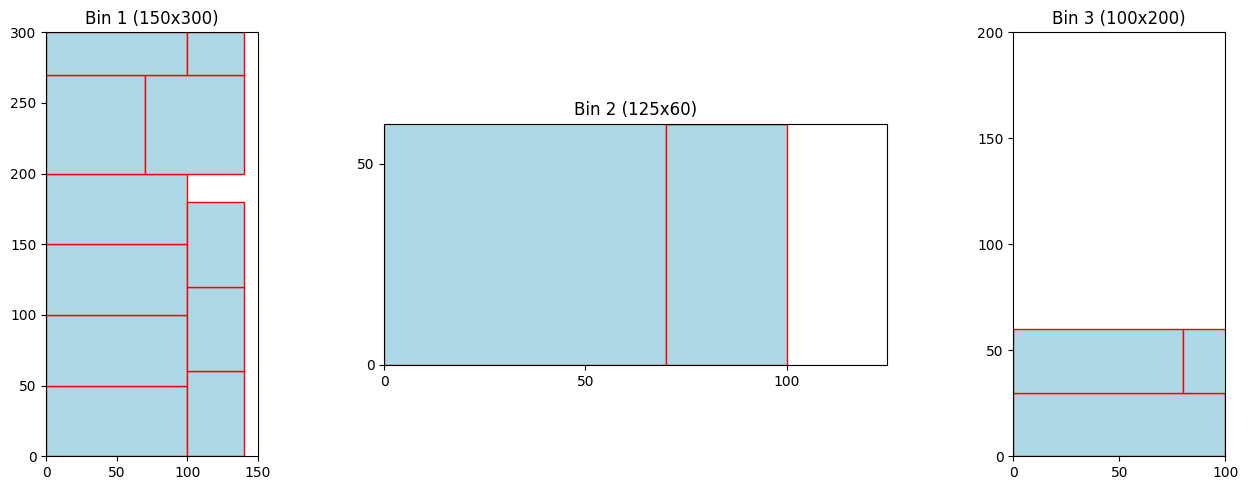

In [5]:
# from rectpack import newPacker
from rectpack import newPacker, PackingMode, PackingBin, MaxRectsBssf, SORT_AREA, SORT_NONE, MaxRectsBaf, MaxRectsBl, SkylineBlWm, SORT_AREA, SORT_NONE, SORT_PERI, SORT_SSIDE
!pip install rectpack
!pip install matplotlib

import matplotlib.pyplot as plt
import matplotlib.patches as patches

# ### Packing rectangles into a number of bins

rectangles = [(100, 30), (40, 60), (30, 30),(70, 70), (100, 50), (30, 40),(100, 30), (40, 60), (30, 60),(70, 70), (100, 50), (30, 30),(100, 30),
 (40, 60), (30, 30),(70, 70), (100, 50), (40, 30),(100, 30), (40, 60), (30, 30),(70, 70), (100, 50), (80, 30)]
bins = [(150, 300), (125,60), (100, 200)]

# Create a packer with specified algorithms and options
packer = newPacker(
    mode=PackingMode.Offline,  # Offline packing mode
    bin_algo=PackingBin.BBF,  # Best Bin Fit algorithm
    pack_algo=MaxRectsBssf,   # Max Rectangles - Best Short Side Fit
    sort_algo=SORT_AREA,      # Sort rectangles by area
    rotation=False             # Allow rotation of rectangles
)

# Add the rectangles to packing queue
for r in rectangles:
	packer.add_rect(*r)

# Add the bins where the rectangles will be placed
for b in bins:
	packer.add_bin(*b)

# Start packing
packer.pack()

packed_rectangles = packer.rect_list()


# Visualization
fig, axes = plt.subplots(1, len(bins), figsize=(15, 5))

for i, b in enumerate(bins):
    ax = axes[i]
    ax.set_xlim(0, b[0])
    ax.set_ylim(0, b[1])
    ax.set_aspect('equal')
    ax.set_title(f"Bin {i+1} ({b[0]}x{b[1]})")

    for rect in packed_rectangles:
        if rect[0] == i:  # Check if rectangle belongs to the current bin
            x, y, w, h = rect[1], rect[2], rect[3], rect[4]
            rect_patch = patches.Rectangle((x, y), w, h, linewidth=1, edgecolor='r', facecolor='lightblue')
            ax.add_patch(rect_patch)

    ax.set_xticks(range(0, b[0] + 1, 50)) # Adjust tick frequency as needed
    ax.set_yticks(range(0, b[1] + 1, 50))

plt.tight_layout()
plt.show()

## Offline + Best Bin Fit + MaxRectsBl

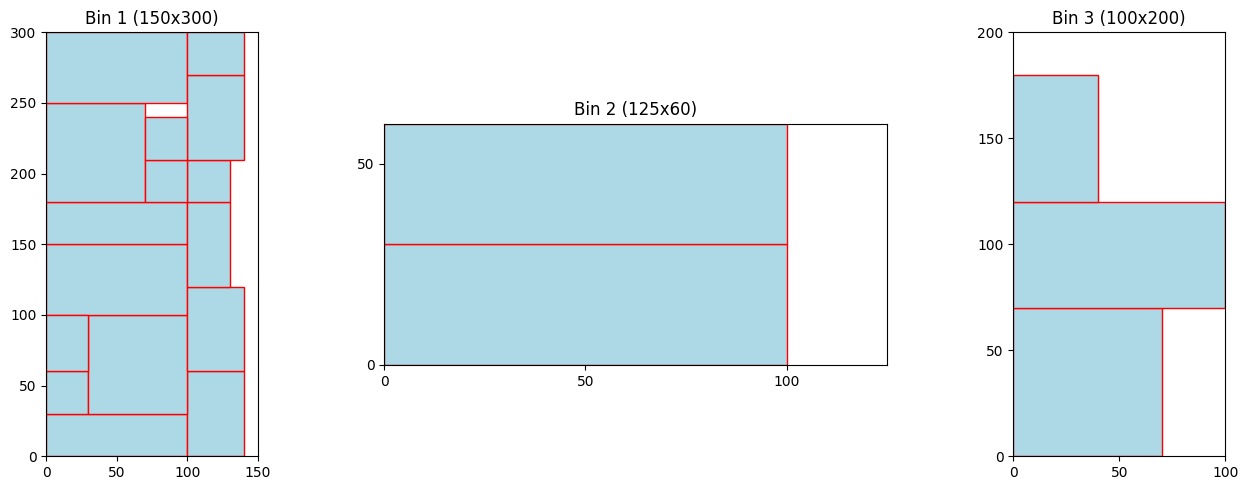

In [ ]:
# from rectpack import newPacker, PackingMode, PackingBin, MaxRectsBssf, SORT_AREA
from rectpack import newPacker, PackingMode, PackingBin, MaxRectsBssf, SORT_AREA, SORT_NONE, MaxRectsBaf, MaxRectsBl #, GuillotineBssf, GuillotineBaf, SkylineBlWm
import matplotlib.pyplot as plt
import matplotlib.patches as patches


rectangles = [(100, 30), (40, 60), (30, 30),(70, 70), (100, 50), (30, 40),(100, 30), (40, 60), (30, 60),(70, 70), (100, 50), (30, 30),(100, 30),
 (40, 60), (30, 30),(70, 70), (100, 50), (40, 30),(100, 30), (40, 60), (30, 30),(70, 70), (100, 50), (80, 30)]
bins = [(150, 300), (125,60), (100, 200)]

# Create a packer with specified algorithms and options
packer = newPacker(
    mode=PackingMode.Offline,

    bin_algo=PackingBin.BBF,

    pack_algo=MaxRectsBl,

    sort_algo=SORT_NONE,

    rotation=False
)


# Add the rectangles to packing queue
for r in rectangles:
	packer.add_rect(*r)

# Add the bins where the rectangles will be placed
for b in bins:
	packer.add_bin(*b)

# Start packing
packer.pack()

packed_rectangles = packer.rect_list()



# Visualization
fig, axes = plt.subplots(1, len(bins), figsize=(15, 5))

for i, b in enumerate(bins):
    ax = axes[i]
    ax.set_xlim(0, b[0])
    ax.set_ylim(0, b[1])
    ax.set_aspect('equal')
    ax.set_title(f"Bin {i+1} ({b[0]}x{b[1]})")

    for rect in packed_rectangles:
        if rect[0] == i:  # Check if rectangle belongs to the current bin
            x, y, w, h = rect[1], rect[2], rect[3], rect[4]
            rect_patch = patches.Rectangle((x, y), w, h, linewidth=1, edgecolor='r', facecolor='lightblue')
            ax.add_patch(rect_patch)

    ax.set_xticks(range(0, b[0] + 1, 50)) # Adjust tick frequency as needed
    ax.set_yticks(range(0, b[1] + 1, 50))

plt.tight_layout()
plt.show()

## For Jit

In [ ]:
# from rectpack import newPacker, PackingMode, PackingBin, MaxRectsBssf, SORT_AREA
from rectpack import newPacker, PackingMode, PackingBin, MaxRectsBssf, SORT_AREA, SORT_NONE, MaxRectsBaf, MaxRectsBl, SkylineBlWm

rectangles = [(100, 30), (40, 60), (30, 30),(70, 70), (100, 50), (30, 40),(100, 30), (40, 60), (30, 60),(70, 70), (100, 50), (30, 30),(100, 30),
 (40, 60), (30, 30),(70, 70), (100, 50), (40, 30),(100, 30), (40, 60), (30, 30),(70, 70), (100, 50), (80, 30)]
bins = [(150, 300), (125,60), (100, 200)]

# Create a packer with specified algorithms and options
packer = newPacker(
    mode=PackingMode.Offline,  # Offline packing mode: Packs all rectangles at once.
    # Alternatives for mode:
    # PackingMode.Online: Packs rectangles one at a time as they arrive.
    # Use this for dynamic or real-time packing scenarios.

    bin_algo=PackingBin.BBF,  # Best Bin Fit: Selects the bin where the rectangle fits best.
    # Alternatives for bin_algo:
    # PackingBin.BFF: Best Fit First - Tries to place each rectangle in the most space-efficient bin.
    # PackingBin.WF: Worst Fit - Chooses the bin with the most remaining space.
    # PackingBin.NF: Next Fit - Uses the first available bin that fits the rectangle.
    # PackingBin.FF: First Fit - Similar to Next Fit but checks all bins in order.

    pack_algo=MaxRectsBl,
		# MaxRectsBssf,   # Max Rectangles (Best Short Side Fit): Chooses placement based on the shortest side.
    # Alternatives for pack_algo:
    # MaxRectsBaf: Best Area Fit - Prioritizes minimizing the leftover space in the bin.
    # MaxRectsBl: Bottom-Left - Places rectangles closest to the bottom-left corner.
    # GuillotineBssf: Guillotine partitioning (Best Short Side Fit) - Cuts bins into sections.
    # GuillotineBaf: Guillotine (Best Area Fit).
    # SkylineBlWm: Skyline (Bottom-Left with Minimal Waste).

    sort_algo=SORT_NONE,
		#  SORT_AREA,      # Sorts rectangles by area (largest first).
    # Alternatives for sort_algo:
    # SORT_NONE: No sorting; rectangles are packed in the order they're added.
    # SORT_PERI: Sorts by perimeter (largest perimeter first).
    # SORT_SIDE: Sorts by the longest side (largest first).
    # SORT_SSIDE: Sorts by the shortest side (largest first).

    rotation=False            # Allow rotation of rectangles: Set to True to enable rotation.
    # Alternatives for rotation:
    # True: Enables 90-degree rotation, which can improve packing efficiency.
    # False: No rotation allowed.
)

# Add the rectangles to the packing queue
for r in rectangles:
    packer.add_rect(*r)

# Add the bins where the rectangles will be placed
for b in bins:
    packer.add_bin(*b)

# Start packing
packer.pack()

# Retrieve the list of packed rectangles
packed_rectangles = packer.rect_list()
print(packed_rectangles)

# Packed rectangles: Each tuple represents (bin_index, x, y, width, height, rid)
# bin_index: Index of the bin where the rectangle was packed
# x, y: Bottom-left corner coordinates of the rectangle in the bin
# width, height: Dimensions of the rectangle
# rid: Rectangle ID (None if not provided)


[(0, 0, 0, 100, 30, None), (0, 100, 0, 40, 60, None), (0, 0, 30, 30, 30, None), (0, 30, 30, 70, 70, None), (0, 0, 100, 100, 50, None), (0, 0, 60, 30, 40, None), (0, 0, 150, 100, 30, None), (0, 100, 60, 40, 60, None), (0, 100, 120, 30, 60, None), (0, 0, 180, 70, 70, None), (0, 0, 250, 100, 50, None), (0, 100, 180, 30, 30, None), (0, 100, 210, 40, 60, None), (0, 70, 180, 30, 30, None), (0, 100, 270, 40, 30, None), (0, 70, 210, 30, 30, None), (1, 0, 0, 100, 30, None), (1, 0, 30, 100, 30, None), (2, 0, 0, 70, 70, None), (2, 0, 70, 100, 50, None), (2, 0, 120, 40, 60, None)]


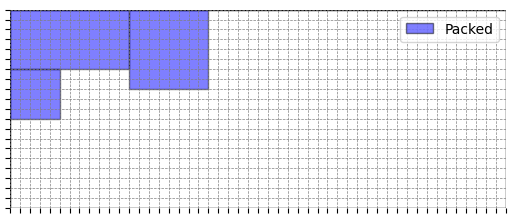

In [41]:
from rectpack import newPacker
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Define the fixed rectangles and their positions
fixed_rectangles = [
    (10, 20, 10, 10),  # (width, height, x, y)
    (50, 30, 70, 70),
]

# Define the other rectangles to be packed
rectangles_to_pack = [
    (50, 50),
    (80, 80),
    (120, 60),
]

# Create a new packer object with rotation allowed
packer = newPacker(rotation=True)

# Add bins (containers)
packer.add_bin(width=200, height=200)

# Add other rectangles to be packed
for width, height in rectangles_to_pack:
    packer.add_rect(width, height)

# Pack the rectangles into the bins
packer.pack()

# Retrieve the packing results
packed_rects = []

for bin in packer:
    for rect in bin:
        packed_rects.append(rect)

# Function to check if two rectangles overlap
def rectangles_overlap(rect1, rect2):
    return not (rect1.x + rect1.width <= rect2[2] or
                rect1.x >= rect2[2] + rect2[0] or
                rect1.y + rect1.height <= rect2[3] or
                rect1.y >= rect2[3] + rect2[1])

# Filter out packed rectangles that overlap with fixed rectangles
non_overlapping_rects = []

for rect in packed_rects:
    overlap = False
    for fixed in fixed_rectangles:
        if rectangles_overlap(rect, fixed):
            overlap = True
            break
    if not overlap:
        non_overlapping_rects.append(rect)

# Manually place the fixed rectangles on the grid
for width, height, x, y in fixed_rectangles:
    non_overlapping_rects.append(patches.Rectangle((x, y), width, height, edgecolor='black', facecolor='red', alpha=0.5, label='Fixed'))

# Plot the grid and rectangles using matplotlib
fig, ax = plt.subplots()

# Draw the bin
bin_width = 500
bin_height = 200
ax.set_xlim(0, bin_width)
ax.set_ylim(0, bin_height)
ax.set_aspect('equal')
ax.add_patch(patches.Rectangle((0, 0), bin_width, bin_height, edgecolor='black', facecolor='none'))

# Draw the non-overlapping packed rectangles
for rect in non_overlapping_rects:
    if isinstance(rect, patches.Rectangle):
        ax.add_patch(rect)
    else:
        ax.add_patch(patches.Rectangle((rect.x, rect.y), rect.width, rect.height, edgecolor='black', facecolor='blue', alpha=0.5, label='Packed'))

# Set grid lines every 10 units
ax.set_xticks(range(0, bin_width + 10, 10))
ax.set_yticks(range(0, bin_height + 10, 10))
ax.grid(which='both', color='gray', linestyle='--', linewidth=0.5)

# Remove axes labels
ax.set_xticklabels([])
ax.set_yticklabels([])

# Remove axes
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Add legend
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys())

# Show the plot
plt.gca().invert_yaxis()
plt.show()
